# Describe our data

Let's take some time to see what kind of data we have and how to further elaborate them in order to better understand the analysis we are about to perform. We have `two datasets`, one keeping information regarding our e-comerce and the other keeping information regarding different countries. 

In [1]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read countries.csv and ab_data.csv into dataframe 
df = pd.read_csv('ab_data.csv')
countries = pd.read_csv('countries.csv')

# Assessing and building Intuition

In [3]:
#print df first attributes and shape
print(df.head())
print(df.shape)

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
(294478, 5)


In [4]:
#print counties.csv first attributes and shape
countries.head()
countries.shape

(290584, 2)

In [5]:
#print info for df and countries dataframes
print(df.info())
print(countries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB
None


In [6]:
#check if we have null values in both dataframes
print(df.isnull().sum())
print(countries.isnull().sum())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64
user_id    0
country    0
dtype: int64


In [7]:
print(df.nunique())
print(countries.nunique())

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64
user_id    290584
country         3
dtype: int64


In [8]:
sum(df.duplicated())

0

In [9]:
#number of control and treatment visitors
print((df['group'] == 'control').sum())
print((df['group'] == 'treatment').sum())

147202
147276


In [10]:
#The number of times the new_page and treatment don't match.
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

# Cleaning Data

In [11]:
# .drop() function is applicable both for rows - attributes and columns - features of the 
# dataframe. In the first case we need to indicate the index in the second the columns 
rows_to_drop = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index
rows_to_drop
df2 = df.drop(rows_to_drop)

In [12]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [17]:
#Sum of duplicated
df2.duplicated().sum()

0

In [18]:
#user_id duplicated
df2.query('user_id.duplicated() == True')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
#information for duplicated user_id
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


# Exploring with Visuals

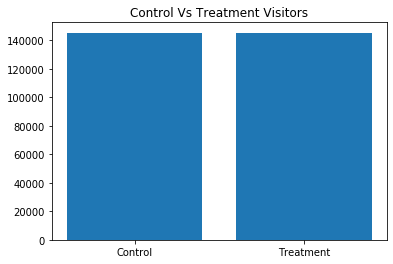

In [179]:
#y-axis
y = [(df2['group'] == 'control').sum(), (df2['group'] == 'treatment').sum()]
#x-axis
x = ['Control', 'Treatment']
#arrange values in x axis
position = np.arange(len(x))
#create bars
plt.bar(position, y)
#create names on x axis
plt.xticks(position, x)
#title
plt.title('Control Vs Treatment Visitors')
#show graphic
plt.show()

In [22]:
#transform timestamp to datetime object so as to manipulate it better
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [50]:
#try out the day 3 of the dataframe 
len(df2.loc[df2['timestamp'].dt.day==3].index)

13208

In [105]:
#Display descriptive statistics the year our experiment took place
df2.groupby(df2['timestamp'].dt.year).describe()

user_id                                                   \
              count           mean           std       min       25%   
timestamp                                                              
2017       290585.0  788004.825246  91224.582639  630000.0  709035.0   

                                        converted                          \
                50%       75%       max     count      mean      std  min   
timestamp                                                                   
2017       787995.0  866956.0  945999.0  290585.0  0.119597  0.32449  0.0   

                               
           25%  50%  75%  max  
timestamp                      
2017       0.0  0.0  0.0  1.0

In [106]:
#Display descriptive statistics the month our experiment took place
df2.groupby(df2['timestamp'].dt.month).describe()

user_id                                                   \
              count           mean           std       min       25%   
timestamp                                                              
1          290585.0  788004.825246  91224.582639  630000.0  709035.0   

                                        converted                          \
                50%       75%       max     count      mean      std  min   
timestamp                                                                   
1          787995.0  866956.0  945999.0  290585.0  0.119597  0.32449  0.0   

                               
           25%  50%  75%  max  
timestamp                      
1          0.0  0.0  0.0  1.0

In [95]:
#Display descriptive statistics the days our experiment took place
df2.groupby(df2['timestamp'].dt.day).describe()

user_id                                                    \
             count           mean           std       min        25%   
timestamp                                                              
2           5712.0  790084.715686  91544.612281  630192.0  710742.50   
3          13208.0  790153.769912  91442.989466  630033.0  711129.50   
4          13119.0  788198.815001  90976.395799  630042.0  708804.00   
5          12932.0  787664.380916  92143.010623  630009.0  707215.00   
6          13353.0  788634.183779  90712.213346  630010.0  710626.00   
7          13213.0  788262.882691  91118.073602  630015.0  710024.00   
8          13387.0  788735.872264  91848.090789  630031.0  709346.00   
9          13243.0  787282.308918  90975.935675  630030.0  707960.50   
10         13350.0  787172.336030  90773.977377  630018.0  709117.00   
11         13361.0  787447.727416  91387.329827  630008.0  708036.00   
12         13159.0  787200.779695  91235.789981  630003.0  707737.50   
13         13060.0  787344.847320  91228.197639  630013.0  707766.75   
14         13148.0  788572.403559  90782.963278  630006.0  710492.50   
15         13263.0  787314.493553  90925.721590  630020.0  708578.50   
16         13136.0  789155.994671  91581.704415  630001.0  710088.25   
17         13155.0  787311.364576  91588.233272  630005.0  707939.50   
18         13085.0  786841.425678  90598.970231  630004.0  708837.00   
19         13130.0  788770.839223  91205.467358  630000.0  710783.50   
20         13213.0  786691.188375  91149.841511  630024.0  707187.00   
21         13309.0  788538.548200  91326.948926  630057.0  709147.00   
22         13265.0  787664.254580  91322.198151  630026.0  708885.00   
23         13349.0  787887.359577  90867.055471  630095.0  709989.00   
24          7435.0  788612.495494  91879.535159  630011.0  708723.00   

                                         converted                           \
                50%        75%       max     count      mean       std  min   
timestamp                                                                     
2          791659.0  870480.75  945952.0    5712.0  0.122724  0.328149  0.0   
3          791924.5  869546.50  945994.0   13208.0  0.113795  0.317574  0.0   
4          788239.0  866721.00  945997.0   13119.0  0.119293  0.324145  0.0   
5          787552.5  868170.75  945972.0   12932.0  0.119084  0.323900  0.0   
6          788900.0  867089.00  945991.0   13353.0  0.119449  0.324328  0.0   
7          787826.0  866953.00  945984.0   13213.0  0.118595  0.323324  0.0   
8          789741.0  868591.50  945988.0   13387.0  0.119818  0.324760  0.0   
9          786305.0  866362.50  945996.0   13243.0  0.118855  0.323630  0.0   
10         786424.0  864955.25  945992.0   13350.0  0.119625  0.324535  0.0   
11         787519.0  866416.00  945967.0   13361.0  0.116982  0.321411  0.0   
12         787164.0  865536.50  945951.0   13159.0  0.122198  0.327526  0.0   
13         788851.0  866040.50  945986.0   13060.0  0.114089  0.317931  0.0   
14         788244.0  866824.50  945917.0   13148.0  0.122984  0.328432  0.0   
15         787113.0  866544.00  945990.0   13263.0  0.117017  0.321453  0.0   
16         789936.0  868775.25  945999.0   13136.0  0.120509  0.325568  0.0   
17         785581.0  867393.50  945956.0   13155.0  0.125048  0.330785  0.0   
18         787342.0  864387.00  945968.0   13085.0  0.124799  0.330504  0.0   
19         788436.0  867976.00  945955.0   13130.0  0.118583  0.323310  0.0   
20         785269.0  865568.00  945993.0   13213.0  0.116476  0.320807  0.0   
21         788855.0  866882.00  945966.0   13309.0  0.120896  0.326018  0.0   
22         786681.0  865856.00  945981.0   13265.0  0.118583  0.323309  0.0   
23         788132.0  866257.00  945911.0   13349.0  0.123380  0.328885  0.0   
24         788597.0  867992.00  945965.0    7435.0  0.119839  0.324795  0.0   

                               
           25%  50%  75%  max  
timestamp          

In [203]:
df2.groupby(df2['timestamp'].dt.hour).describe()

user_id                                                    \
             count           mean           std       min        25%   
timestamp                                                              
0          11908.0  789083.218677  91307.213305  630034.0  709864.50   
1          12250.0  787137.672816  91655.140530  630052.0  707056.50   
2          12070.0  786660.159238  90718.289763  630070.0  709281.25   
3          12121.0  788423.139840  91544.894930  630001.0  707905.00   
4          12013.0  788052.283942  91903.531855  630013.0  707422.00   
5          12242.0  787671.214916  91284.675663  630006.0  708630.25   
6          12058.0  789316.440454  91010.172076  630000.0  710289.75   
7          12161.0  787056.125154  91547.813893  630015.0  707380.00   
8          12131.0  788282.640920  90813.646896  630057.0  709598.00   
9          11965.0  787455.070121  91478.602604  630011.0  707258.00   
10         12111.0  788889.394022  90862.398132  630003.0  710625.50   
11         12157.0  785867.737353  91304.939328  630018.0  707327.00   
12         12130.0  788054.169167  91147.725357  630033.0  709940.50   
13         12015.0  787657.678069  90866.938059  630094.0  709885.50   
14         12227.0  787734.790709  91580.097593  630096.0  707431.00   
15         11908.0  787785.373614  91011.650913  630023.0  709984.50   
16         12269.0  788253.576249  91226.766637  630008.0  708302.00   
17         12203.0  788220.238712  90826.940961  630026.0  710162.00   
18         12134.0  787912.780287  91468.214846  630028.0  708875.50   
19         12135.0  789188.391100  91070.381121  630002.0  710568.50   
20         12057.0  787636.822012  90688.043690  630004.0  710199.00   
21         12049.0  787883.593410  91893.995647  630005.0  708367.00   
22         12173.0  788554.179906  91315.155515  630029.0  709391.00   
23         12098.0  789362.335841  90836.892502  630009.0  710821.75   

                                         converted                           \
                50%        75%       max     count      mean       std  min   
timestamp                                                                     
0          789118.5  867909.50  945970.0   11908.0  0.120339  0.325372  0.0   
1          786054.5  866559.50  945964.0   12250.0  0.113714  0.317477  0.0   
2          785492.5  865562.25  945988.0   12070.0  0.113339  0.317020  0.0   
3          789614.0  867556.00  945990.0   12121.0  0.115007  0.319044  0.0   
4          788067.0  868884.00  945999.0   12013.0  0.114126  0.317978  0.0   
5          786659.5  867288.25  945967.0   12242.0  0.120895  0.326019  0.0   
6          790642.5  867472.25  945997.0   12058.0  0.121330  0.326524  0.0   
7          787195.0  866470.00  945998.0   12161.0  0.117589  0.322134  0.0   
8          789510.0  867041.50  945957.0   12131.0  0.118457  0.323162  0.0   
9          787858.0  865735.00  945978.0   11965.0  0.125198  0.330958  0.0   
10         788975.0  867316.50  945971.0   12111.0  0.117579  0.322122  0.0   
11         784592.0  864462.00  945992.0   12157.0  0.122810  0.328232  0.0   
12         788242.5  866078.25  945950.0   12130.0  0.123908  0.329490  0.0   
13         786853.0  866409.50  945985.0   12015.0  0.120599  0.325675  0.0   
14         788138.0  867361.50  945994.0   12227.0  0.118018  0.322642  0.0   
15         786622.0  866357.50  945973.0   11908.0  0.121179  0.326349  0.0   
16         788268.0  867331.00  945976.0   12269.0  0.117450  0.321969  0.0   
17         788476.0  866821.00  945993.0   12203.0  0.122183  0.327511  0.0   
18         787633.5  867336.50  945996.0   12134.0  0.126586  0.332523  0.0   
19         789944.0  867670.00  945981.0   12135.0  0.117099  0.321552  0.0   
20         787060.0  865070.00  945991.0   12057.0  0.118437  0.323139  0.0   
21         788637.0  867881.00  945925.0   12049.0  0.120674  0.325761  0.0   
22         789749.0  866937.00  945953.0   12173.0  0.119527  0.324421  0.0   
23         7

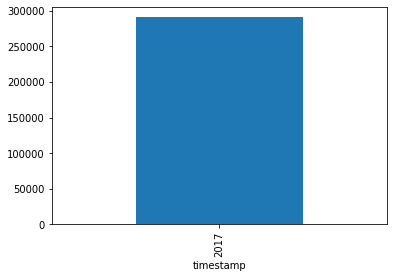

In [107]:
#Visualize the year our experiment took place
df2.groupby(df2['timestamp'].dt.year).describe()['user_id'].unstack()['count'].plot(kind = 'bar');

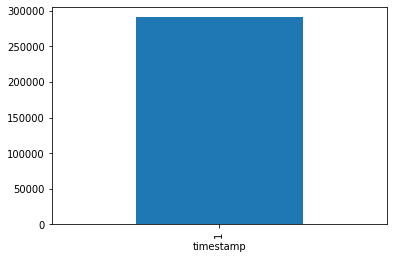

In [108]:
#Visualize the month our experiment took place
df2.groupby(df2['timestamp'].dt.month).describe()['user_id'].unstack()['count'].plot(kind = 'bar');

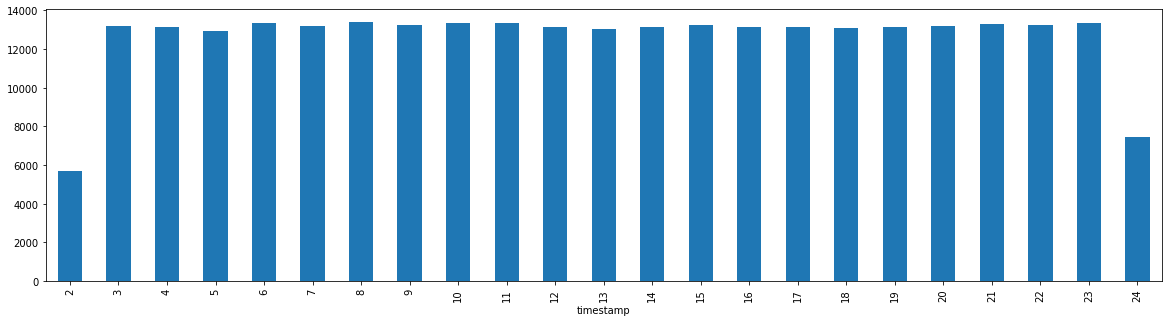

In [222]:
#Visualize the days our experiment took place
df2.groupby(df2['timestamp'].dt.day).describe()['user_id'].unstack()['count'].plot(figsize = (20, 5),kind = 'bar');

In [111]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null datetime64[ns]
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 23.3+ MB


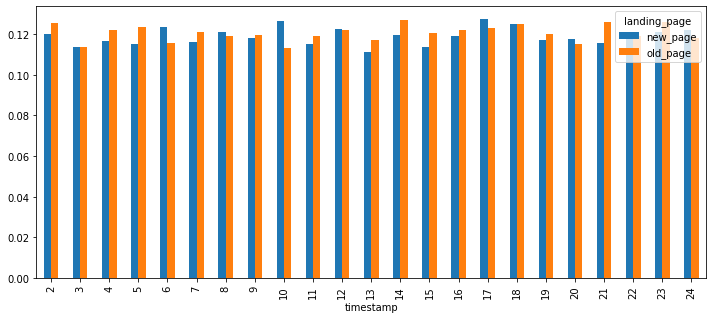

In [163]:
df2.groupby([df2.timestamp.dt.day, df2.landing_page])['converted'].mean().unstack().plot(figsize = (12,5),kind='bar');

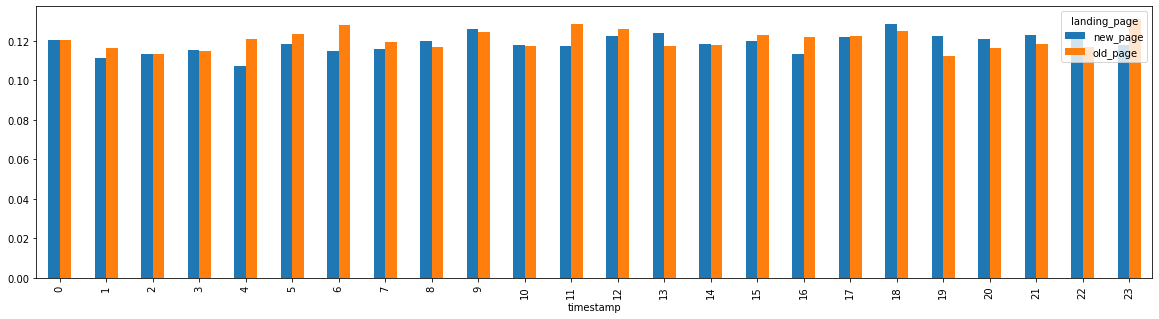

In [216]:
df2.groupby([df2.timestamp.dt.hour, df2.landing_page])['converted'].mean().unstack().plot(figsize = (20,5),kind='bar');

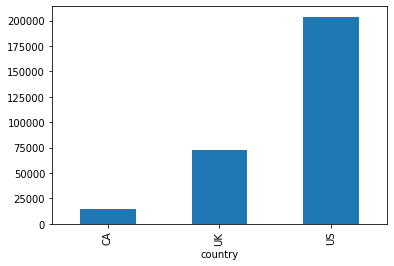

In [178]:
countries.groupby([countries['country']]).describe()['user_id'].unstack()['count'].plot(kind='bar');

In [188]:
countries[countries.duplicated()].sum()

user_id    0.0
country    0.0
dtype: float64

In [192]:
countries.columns

Index(['user_id', 'country'], dtype='object')

In [193]:
df2.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

# Merging DataFrames

In [194]:
df_combined = df2.merge(countries, left_on = 'user_id', right_on = 'user_id', how = 'inner')

In [197]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 290584
Data columns (total 6 columns):
user_id         290585 non-null int64
timestamp       290585 non-null datetime64[ns]
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
country         290585 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 15.5+ MB


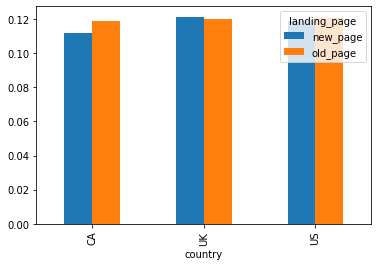

In [202]:
df_combined.groupby(['country', 'landing_page'])['converted'].mean().unstack().plot(kind = 'bar');

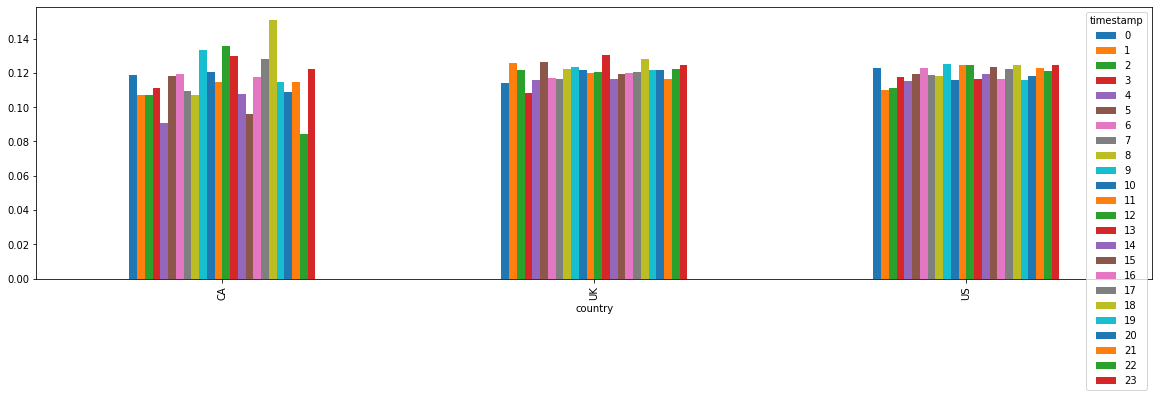

In [217]:
df_combined.groupby(['country', df_combined.timestamp.dt.hour])['converted'].mean().unstack().plot(figsize = (20, 5),kind = 'bar');

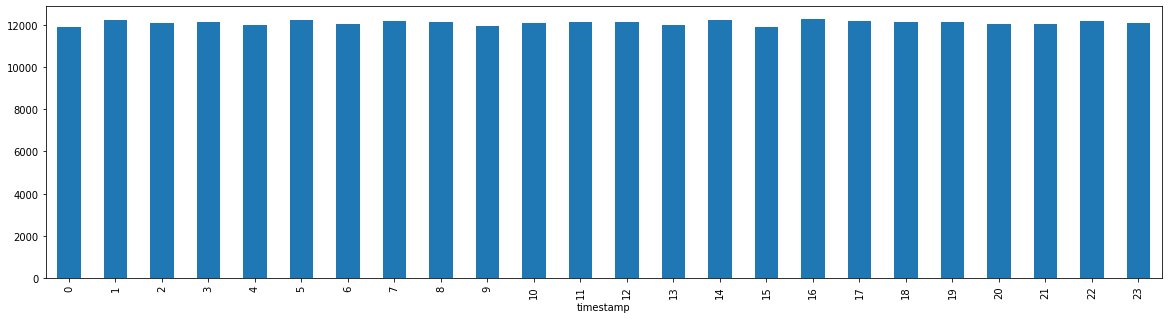

In [226]:
df_combined.groupby(df_combined.timestamp.dt.hour)['landing_page'].count().plot(figsize = (20, 5), kind='bar');